In [1]:
#!pip install opencv-python

In [2]:
#pip install pytest-warnings

In [3]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

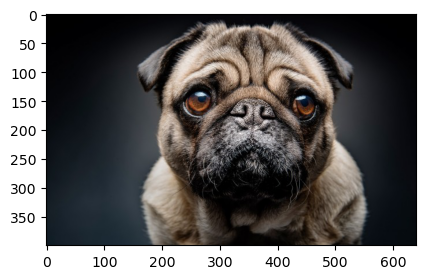

In [4]:
plt.figure(figsize=(5,3))
img=plt.imread('CuteDog.jpg')
plt.imshow(img)
plt.grid(False)
plt.show()

In [5]:
img.shape

(400, 640, 3)

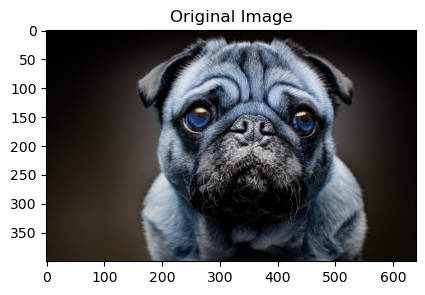

In [6]:
def catImageshow(imageTitle,image):
    color_convert=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(5,3))
    plt.imshow(color_convert)
    plt.title(imageTitle)
    plt.show()
catImageshow("Original Image",img)

# 1 Gray

In [7]:
gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

In [8]:
gray.shape

(400, 640)

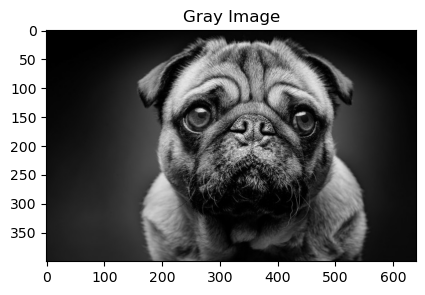

In [9]:
catImageshow("Gray Image",gray)

In [10]:
gradientX=cv2.Sobel(gray,ddepth=cv2.CV_32F,dx=1,dy=0,ksize=3)
gradientY=cv2.Sobel(gray,ddepth=cv2.CV_32F,dx=0,dy=1,ksize=3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


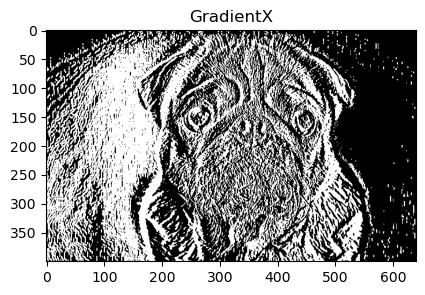

In [11]:
catImageshow("GradientX",gradientX)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


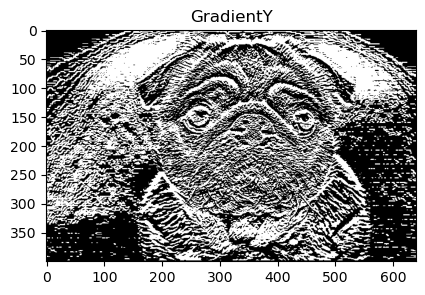

In [12]:
catImageshow("GradientY",gradientY)

# 2 Masking

In [13]:
img.shape

(400, 640, 3)

In [14]:
img.shape[:2]

(400, 640)

In [15]:
mask=np.zeros(img.shape[:2],dtype="uint8")

In [16]:
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

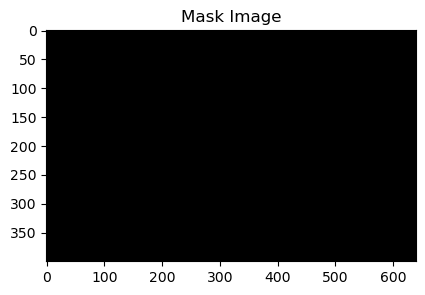

In [17]:
cv2.rectangle(mask,(100,500),(150,100),0)
catImageshow("Mask Image",mask)

# 3 Bit Mask

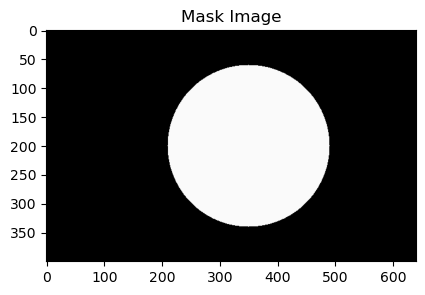

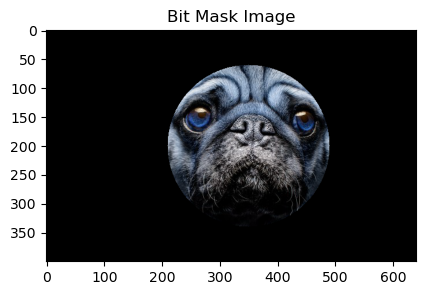

In [19]:
cv2.circle(mask,(350,200),140,250,-1)
bit_mask=cv2.bitwise_and(img,img,mask=mask)
catImageshow("Mask Image",mask)
catImageshow("Bit Mask Image",bit_mask)

# 4 Image Scaling

In [20]:
img.shape

(400, 640, 3)

In [21]:
img/255

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.0627451 , 0.10196078, 0.1372549 ],
        [0.0627451 , 0.10196078, 0.1372549 ],
        [0.0627451 , 0

In [22]:
img.shape

(400, 640, 3)

# 5 Resize Image

In [24]:
customizeH=120/img.shape[0]
customizeW=120/img.shape[1]

In [25]:
customizeW

0.1875

In [26]:
customizeH

0.3

In [27]:
imgDimension=(120,int(img.shape[0]*customizeW))

In [29]:
imgDimension

(120, 75)

In [30]:
img.shape

(400, 640, 3)

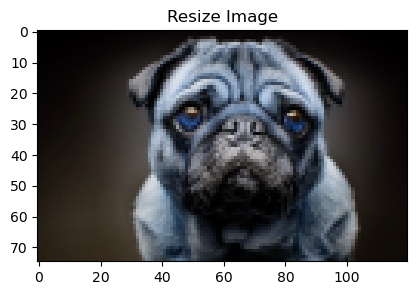

In [32]:
resizeImg=cv2.resize(img,imgDimension,interpolation=cv2.INTER_AREA)
catImageshow("Resize Image",resizeImg)

In [33]:
resizeImg.shape

(75, 120, 3)

# 6 Rotate Image

In [34]:
(imageH,imageW)=img.shape[:2]

In [35]:
imageH

400

In [36]:
imageW

640

In [37]:
(centerX,centerY)=(imageH//2,imageW//2)

In [38]:
centerX

200

In [39]:
centerY

320

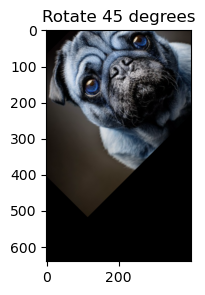

In [43]:
imageRotate=cv2.getRotationMatrix2D((centerX,centerY),45,1.0)
rotateNow=cv2.warpAffine(img,imageRotate,(imageH,imageW))
catImageshow("Rotate 45 degrees",rotateNow)

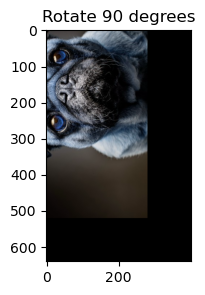

In [44]:
imageRotate=cv2.getRotationMatrix2D((centerX,centerY),90,1.0)
rotateNow=cv2.warpAffine(img,imageRotate,(imageH,imageW))
catImageshow("Rotate 90 degrees",rotateNow)

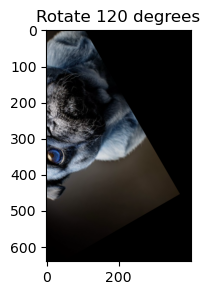

In [45]:
imageRotate=cv2.getRotationMatrix2D((centerX,centerY),120,1.0)
rotateNow=cv2.warpAffine(img,imageRotate,(imageH,imageW))
catImageshow("Rotate 120 degrees",rotateNow)

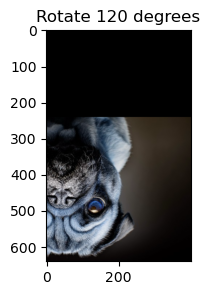

In [46]:
imageRotate=cv2.getRotationMatrix2D((centerX,centerY),180,1.0)
rotateNow=cv2.warpAffine(img,imageRotate,(imageH,imageW))
catImageshow("Rotate 120 degrees",rotateNow)